<a href="https://colab.research.google.com/github/soham2710/logistic_regression/blob/main/LR_Encord_Soham.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   survived  pclass  sex   age  sibsp  parch     fare embarked  class    who  \
0         0       3    1  22.0      1      0   7.2500        S  Third    man   
1         1       1    0  38.0      1      0  71.2833        C  First  woman   
2         1       3    0  26.0      0      0   7.9250        S  Third  woman   
3         1       1    0  35.0      1      0  53.1000        S  First  woman   
4         0       3    1  35.0      0      0   8.0500        S  Third    man   

   adult_male  embark_town alive  alone  
0        True  Southampton    no  False  
1       False    Cherbourg   yes  False  
2       False  Southampton   yes   True  
3       False  Southampton   yes  False  
4        True  Southampton    no   True  
Accuracy: 0.7902097902097902
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.90      0.83        80
           1       0.84      0.65      0.73        63

    accuracy                           0.79       1

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


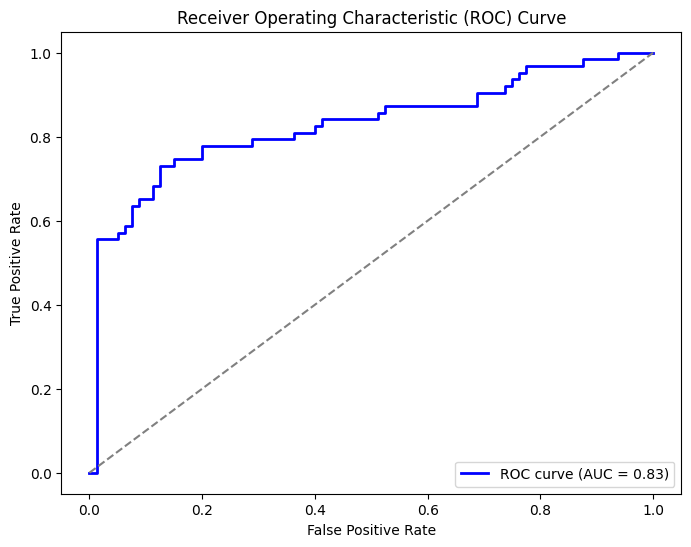

In [20]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
# Load Titanic dataset from seaborn
titanic_data = sns.load_dataset('titanic')
titanic_data.drop('deck',axis=1,inplace=True)
titanic_data.dropna(inplace=True)
# Import label encoder
from sklearn import preprocessing
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'Country'.
titanic_data['sex']= label_encoder.fit_transform(titanic_data['sex'])
print(titanic_data.head())
# Select features and target variable
X = titanic_data[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare']]
y = titanic_data['survived']
# Split the dataset into training and test sets (e.g., 80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Initialize and train the logistic regression model
logistic_reg = LogisticRegression()
logistic_reg.fit(X_train, y_train)
# Make predictions on the test set
predictions = logistic_reg.predict(X_test)
# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)
# Generate classification report
print("Classification Report:")
print(classification_report(y_test, predictions))
from sklearn.metrics import roc_curve, auc
# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, logistic_reg.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()